# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [ ]:
!conda install pandas seaborn -y

In [4]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [5]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [6]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic.fillna({"age": titanic["age"].mean()}, inplace=True)

# 2.3 Drop the rows with missing values in embarked
titanic.dropna(subset=["embarked"], inplace=True)

# 2.4 Drop the unused columns column
titanic.drop(columns=["deck", "who", "embark_town", "class"], inplace=True)


(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
print(titanic.isnull().sum())
print(titanic.shape)

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alive         0
alone         0
dtype: int64
(889, 11)


In [22]:
# 3 Analyse data
# 3.1 Calculate the overall survival rate of the Titanic passengers
survival_rate = titanic["survived"].sum() / titanic.shape[0] * 100
survival_rate = titanic["survived"].mean() * 100
print(f"Overall survival rate: {survival_rate}")

Overall survival rate: 38.24521934758155


In [25]:
# 3.2 Analyze the distribution of passengers by class (Pclass) and by port of embarkation (Embarked).
distribution_by_class = pd.crosstab(titanic["embarked"], titanic["pclass"])
distribution_by_class = titanic.groupby(["embarked", "pclass"]).size()
distribution_by_class = titanic.groupby(["embarked", "pclass"]).size().reset_index(name="count")
distribution_by_class["percentage"] = distribution_by_class["count"] / distribution_by_class.groupby("pclass")["count"].transform('sum') * 100
distribution_by_class

,embarked,pclass,count,percentage
0,C,1,85,39.719626
1,C,2,17,9.239130
2,C,3,66,13.441955
3,Q,1,2,0.934579
4,Q,2,3,1.630435
5,Q,3,72,14.663951
6,S,1,127,59.345794
7,S,2,164,89.130435
8,S,3,353,71.894094


In [31]:
distribution_by_class.groupby("pclass")["count"].transform('sum')

0    214
1    184
2    491
3    214
4    184
5    491
6    214
7    184
8    491
Name: count, dtype: int64

In [41]:
# 3.3 Calculate the proportion of male and female passengers.
male_proportion = titanic[titanic['sex'] == "male"]["sex"].count() / len(titanic) * 100
gender_proportion = pd.Series([male_proportion, 100 - male_proportion], index=["male", "female"], name="Gender proportion")

titanic.groupby("sex").size() / titanic.shape[0] * 100
gender_proportion = titanic["sex"].value_counts(normalize=True)
gender_proportion

sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64

In [43]:
# 3.4 Identify the age distribution of passengers and find the most represented age categories.
age_distribution = titanic["age"].value_counts().sort_index()
print(age_distribution)

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 89, dtype: int64


In [46]:
bins = range(0, 101, 10)
labels = [f"{a}-{a+9}" for a in range(0, 91, 10)]

titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)
print(titanic["age_group"].value_counts().sort_index())

age_group
0-9       64
10-19    115
20-29    407
30-39    154
40-49     86
50-59     42
60-69     16
70-79      5
80-89      0
90-99      0
Name: count, dtype: int64


In [15]:
# Create age categories
bins = [0, 18, 30, 50, 100]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

# Cut the 'Age' column into the specified bins
titanic['Age_Category'] = pd.cut(titanic['age'], bins=bins, labels=labels)
print(titanic['Age_Category'].value_counts(normalize=True))

Age_Category
18-29    0.502812
30-49    0.269966
0-17     0.156355
50+      0.070866
Name: proportion, dtype: float64


In [53]:
# 4 Alives analyse
# 4.1 Analyze survival based on ticket class (Pclass).
survival_by_class = titanic.groupby("pclass")["survived"].mean()
survival_by_class

pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [57]:
survival_pclass = titanic.groupby('pclass')['survived'].value_counts(normalize=True).unstack() * 100
survival_pclass

survived,0,1
pclass,,
1,37.383178,62.616822
2,52.717391,47.282609
3,75.763747,24.236253


In [14]:
# 4.2 Analyze survival based on gender (Sex).
survival_by_gender = titanic.groupby("sex")["survived"].value_counts(normalize=True).unstack().rename(columns={0 : "Death", 1: "Alive"}).rename(columns={"Death": "Not survived", "Alive": "Survived"}) * 100
survival_by_gender

survived,Not survived,Survived
sex,,
female,25.961538,74.038462
male,81.109185,18.890815


In [17]:
# 4.3 Analyze survival based on age.
titanic.groupby("Age_Category")["survived"].value_counts(normalize=True).unstack() * 100

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_42090/3451395143.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("Age_Category")["survived"].value_counts(normalize=True).unstack() * 100


survived,0,1
Age_Category,,
0-17,49.640288,50.359712
18-29,66.890380,33.109620
30-49,57.916667,42.083333
50+,66.666667,33.333333


In [30]:
print(titanic.groupby("Age_Category")["survived"].sum() / titanic.shape[0] * 100)
print(titanic.groupby("Age_Category")["survived"].sum() / titanic.shape[0] * 100 / survival_rate * 100)

Age_Category
0-17      7.874016
18-29    16.647919
30-49    11.361080
50+       2.362205
Name: survived, dtype: float64
Age_Category
0-17     20.588235
18-29    43.529412
30-49    29.705882
50+       6.176471
Name: survived, dtype: float64


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_42090/2063012229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby("Age_Category")["survived"].sum() / titanic.shape[0] * 100)
/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_42090/2063012229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby("Age_Category")["survived"].sum() / titanic.shape[0] * 100 / survival_rate * 100)


In [31]:
# 4.4 Analyze survival based on port of embarkation (Embarked).
survival_by_embarkation = titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack() * 100
print(survival_by_embarkation)

survived          0          1
embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


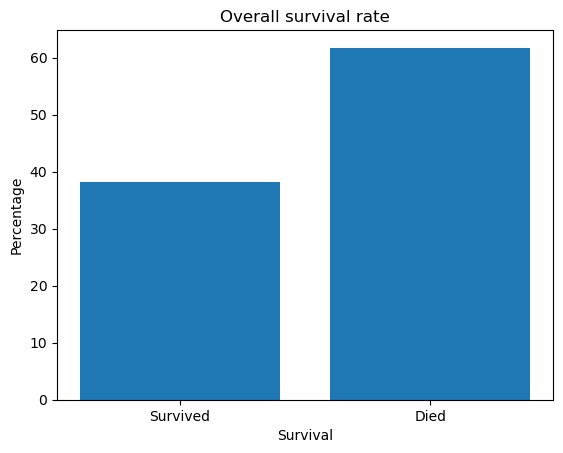

In [40]:
# 5 Plottings
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.
plt.bar(["Survived", "Died"], [survival_rate, 100 - survival_rate])
plt.title("Overall survival rate")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

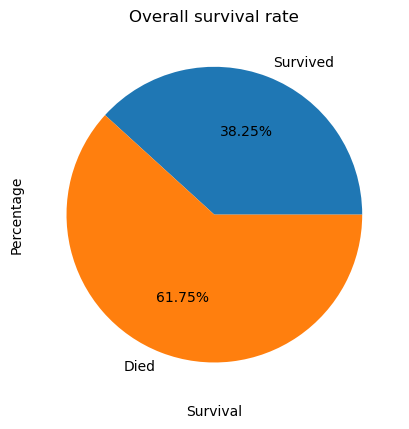

In [ ]:
# 5 Plottings
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.
plt.pie([survival_rate, 100 - survival_rate], labels=["Survived", "Died"], autopct="%1.2f%%" )
plt.title("Overall survival rate")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

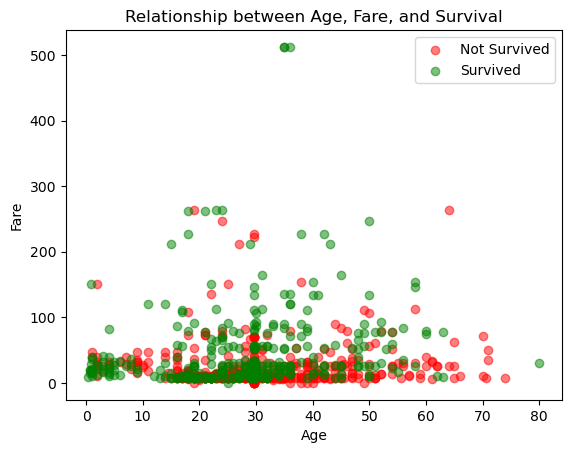

In [54]:
plt.scatter(
  titanic[titanic["survived"] == 0]["age"], 
  titanic[titanic["survived"] == 0]["fare"],
  color="red", label="Not Survived", alpha=0.5
)

plt.scatter(
  titanic[titanic["survived"] == 1]["age"], 
  titanic[titanic["survived"] == 1]["fare"],
  color="green", label="Survived", alpha=0.5
)

# Adding labels and title
plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

# Show the plot
plt.show()


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_42090/1309903690.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


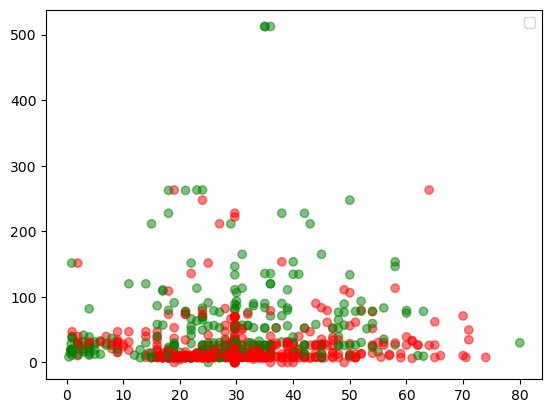

In [56]:
plt.scatter(
  titanic.age,
  titanic.fare,
  c=np.where(titanic.survived == 1, "g", "r"),
  alpha=0.5,
  
)

plt.legend()

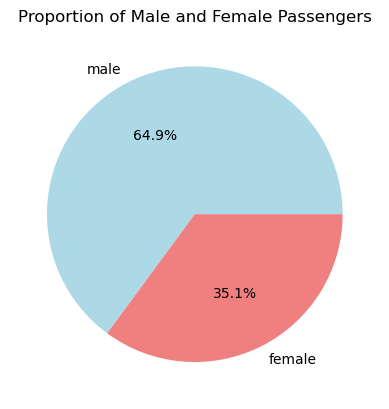

In [58]:
# 5.4 Produce a pie chart to show the proportion of male and female passengers
# Calculate the proportion of male and female passengers
gender_proportion = titanic['sex'].value_counts(normalize=True)# Plotting the pie chart

labels = gender_proportion.index
sizes = gender_proportion.values
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Adding title
plt.title('Proportion of Male and Female Passengers')

# Show the plot
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

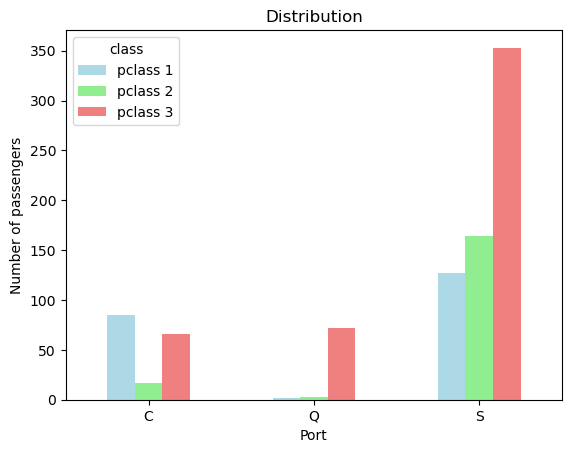

In [65]:
class_port = titanic.groupby(["embarked", "pclass"]).size().unstack()
fig, ax = plt.subplots()
bar_plot = class_port.plot(kind="bar", stacked=False, ax=ax, color=["lightblue", "lightgreen", "lightcoral"])
plt.title("Distribution")
plt.xlabel("Port")
plt.xticks(rotation=0)
plt.ylabel("Number of passengers")
plt.legend(title="class", labels=["pclass 1", "pclass 2", "pclass 3"])

In [ ]:
# 6 Bonus for the datascients experts ;P